In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime
import pandas_datareader.data as web

In [34]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 6)
btc = web.DataReader('BTC-USD','yahoo', start, end)

In [35]:
btc = btc[~btc.index.duplicated(keep='first')]

In [36]:
btc = btc.drop(columns=['High','Low','Open','Close','Volume'])

In [37]:
btc.columns = ['Price']

In [38]:
btc = btc.reset_index()

In [39]:
r = pd.date_range(start=btc.Date.min(), end=btc.Date.max())
btc = btc.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [40]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date',inplace=True)

In [41]:
btc = btc.fillna(method='ffill')
btc = btc.fillna(method='bfill')

In [42]:
btc = btc.loc['2019-09-27':'2020-10-06']

In [43]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 6)
gold = web.DataReader('GC=F','yahoo', start, end)

In [44]:
gold = gold.loc['2019-09-27':'2020-10-06']

In [45]:
gold = gold.drop(columns=['High','Low','Open','Close','Volume'])

In [46]:
gold.columns = ['Price']

In [47]:
gold = gold.reset_index()

In [48]:
r = pd.date_range(start=gold.Date.min(), end=gold.Date.max())
gold = gold.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [49]:
gold['Date'] = pd.to_datetime(gold['Date'])
gold.set_index('Date',inplace=True)

In [50]:
gold = gold.fillna(method='ffill')
gold = gold.fillna(method='bfill')

In [51]:
frames = [btc,gold]

In [52]:
btc_gold = pd.concat(frames,sort=False,axis=1)

In [53]:
btc_gold.columns = ['BTC','GOLD']

In [54]:
btc_gold = btc_gold.reindex(columns = ['GOLD', 'BTC'])

In [55]:
btc_gold = btc_gold.fillna(method='ffill')
btc_gold = btc_gold.fillna(method='bfill')

In [56]:
x = btc_gold.iloc[:,:-1].values
y = btc_gold.iloc[:,-1].values

In [57]:
y = y.reshape(len(y),1)

In [58]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
x = ss_x.fit_transform(x)
y = ss_y.fit_transform(y)

In [59]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
ss_y.inverse_transform(regressor.predict(ss_x.transform([[1922]])))

array([10845.79993242])

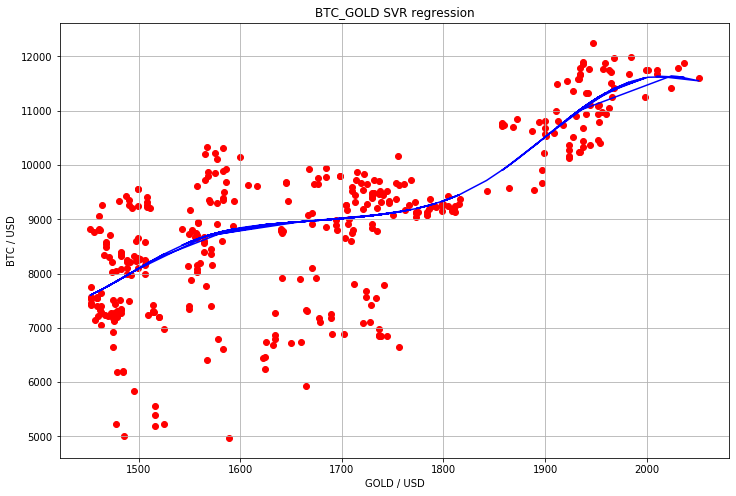

In [61]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(ss_x.inverse_transform(x), ss_y.inverse_transform(y), color='red')
plt.plot(ss_x.inverse_transform(x), ss_y.inverse_transform(regressor.predict(x)),color='blue')
plt.title('BTC_GOLD SVR regression')
plt.xlabel('GOLD / USD')
plt.ylabel('BTC / USD')
plt.show()